# KARBAPENEM DİRENÇLİ ENTEROBACTERIACEAE ENFEKSİYONU RİSK FAKTÖRLERİ VE ENFEKSİYONU OLAN HASTALARDA MORTALİTENİN DEĞERLENDİRİLMESİ

**Makine Öğrenmesi Yöntemleri ile Değerlendirilmesi**


---


Prof. Dr. Gül Ruhsar YILMAZ

Prof. Dr. Muhammet DEMİRBİLEK

Öğr. Gör. Süleyman EZDEMİR

Talha DEMİRBİLEK

Ensar DEMİRBİLEK


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/data_charIndex_yas.csv')

Eksik Verileri NaN olarak değiştirelim.

In [ ]:
dataset.replace("?",np.nan, inplace=True)
dataset

,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   apache  284 non-null    float64
 1   yas     440 non-null    int64  
 2   vaka    440 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 10.4 KB


In [ ]:
maxyas=dataset.yas.max()
i=0
s=0
for yas in dataset.yas:
  if yas==maxyas:
    print(i)
    s=i
  i+=1
print(dataset.iloc[s])
dataset=dataset.drop(dataset.index[s])


306
apache     17.0
yas       667.0
vaka        2.0
Name: 306, dtype: float64


# Eksik Veri

Eksik verilerin bulunduğu satırları silme

In [ ]:
dataset_1=dataset.dropna()

In [ ]:
print(dataset_1.dtypes)
dataset_1

apache    float64
yas         int64
vaka        int64
dtype: object


,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
dataset_1.loc.apache = dataset_1.apache.astype(int)
print(dataset_1.dtypes)

apache    float64
yas         int64
vaka        int64
dtype: object


In [ ]:
dataset_1

,apache,yas,vaka
0,8.0,64,1
1,18.0,69,1
2,18.0,66,1
3,17.0,66,1
4,10.0,75,1
...,...,...,...
435,8.0,79,2
436,21.0,74,2
437,6.0,58,2
438,8.0,65,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset_1)
data_scaled2 = pd.DataFrame(x_scaled)
data_scaled2.head()

,0,1,2
0,0.137931,0.589041,0.0
1,0.310345,0.657534,0.0
2,0.310345,0.616438,0.0
3,0.293103,0.616438,0.0
4,0.172414,0.739726,0.0


In [ ]:
X = data_scaled2.iloc[:, :-1].values
y = data_scaled2.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#print(X_train)

In [ ]:
#print(y_train)

In [ ]:
#print(X_test)

In [ ]:
#print(y_test)

KARAR AĞACI SVM Algoritması

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#print(classifier.predict(min_max_scaler.transform([[30]])))

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22 12]
 [28  9]]


0.43661971830985913

<ipython-input-26-af3e91fb8b71>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


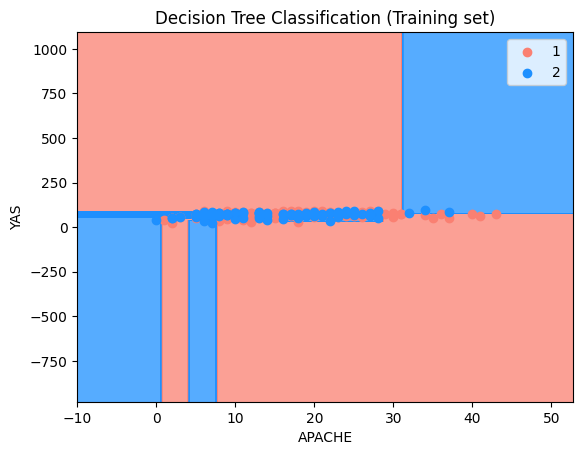

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('APACHE')
plt.ylabel('YAS')
plt.legend()
plt.show()

<ipython-input-27-14b6630b5358>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


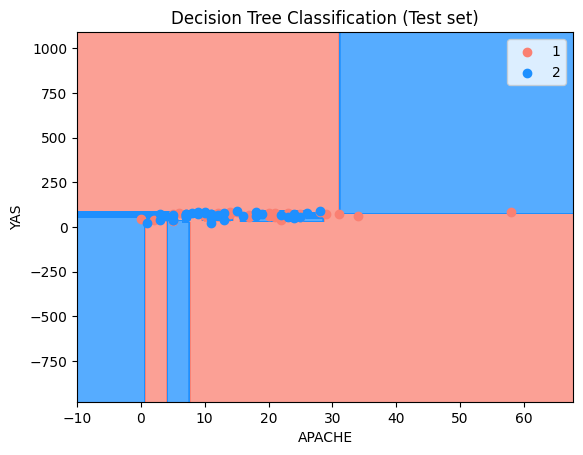

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('APACHE')
plt.ylabel('YAS')
plt.legend()
plt.show()